###  Simulating batch Bayesian optimization with external objective evaluation

Template for batch BOpt with external evaluation, using GPyOpt. External evaluation is simulated via an evaluating an actual objective function outside GPyOpt, then passing new evaluations to GPyOpt.

In [1]:
%matplotlib inline
import GPy
import GPyOpt
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import seed
seed(12345)

In [2]:
# Define an arbitrary objective function
# In reality this might be an experimental evaluation
f = lambda x: -np.cos(2*np.pi*x) + 0.5*np.sin(6*np.pi*x)

# Sample the next data point and add Gaussian noise
def sample_point(X, Y, point, function):
    '''
    Sample next point in BOpt and append to existing array X
    Return X, Y and plot updated samples
    '''
    X = np.append(X, point)
    
    new_Y = f(point) + 0.1 * np.random.randn(1, 1)
    
    Y = np.append(Y, new_Y)[:, None]

    return X, Y

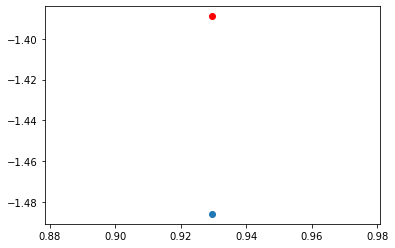

In [3]:
# Generate initial data points with Gaussian noise
initial_points = 1

X = np.random.uniform(0,1,initial_points)
Y = f(X)[:, None] + 0.1 * np.random.randn(X.shape[0], 1)
plt.plot(X, Y, 'o')
plt.plot(X, f(X), 'ro')
plt.show()

In [4]:
# # Test fitting Gaussian process to data points and plotting

# k = GPy.kern.RBF(1, variance=1.)
# # k = GPy.kern.Matern52(1, variance=1.)

# GP = GPy.models.GPRegression(X = X[:, None],
#                              Y = Y,
#                              kernel = k,
#                              noise_var = 0.01
#                             )

# GP.optimize_restarts(num_restarts=20,
#                      parallel = True,
#                      robust = True,
#                      optimizer = 'bfgs',
#                      max_iters=100,
#                      verbose = False)

# GP.plot()
# plt.xlim(0,1)
# plt.ylim(-2,2)

After setting up our 'experiment', we run the Bayesian optimization via GPyOpt

Next points: [array([0.81463688]), array([0.98404175])]


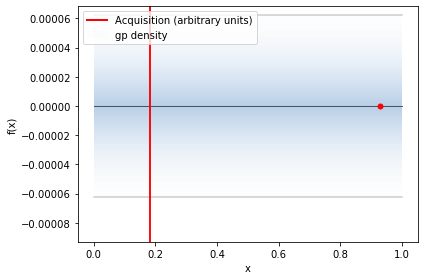

Next points: [array([0.46003362]), array([0.52486947])]


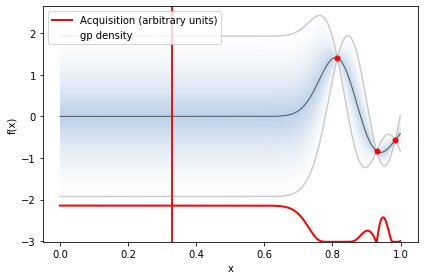

Next points: [array([0.]), array([0.20809835])]


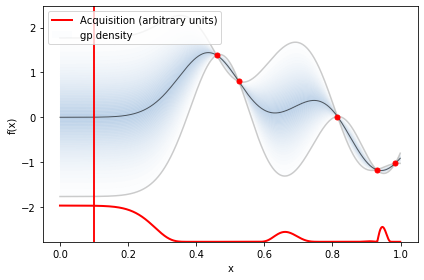

Next points: [array([0.66127265]), array([0.09338364])]


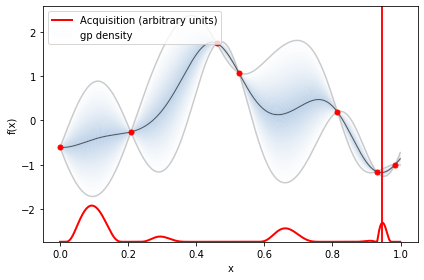

Next points: [array([1.]), array([0.9879931])]


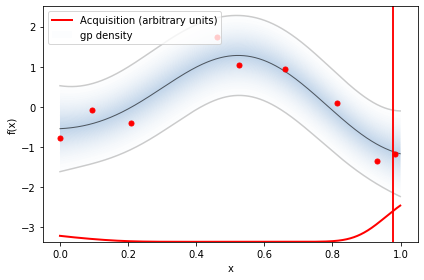

Next points: [array([0.29031785]), array([0.93649989])]


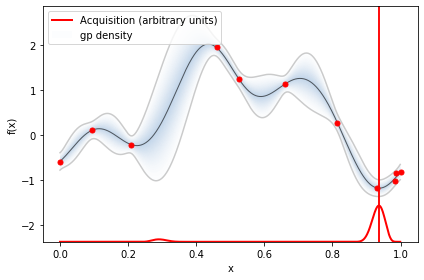

Next points: [array([0.9329343]), array([0.9329343])]


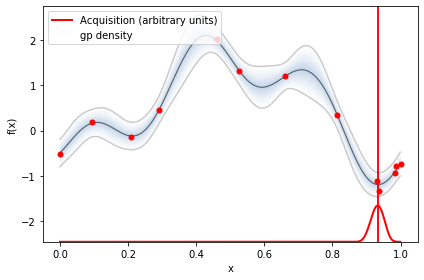

Next points: [array([0.93860637]), array([0.93860637])]


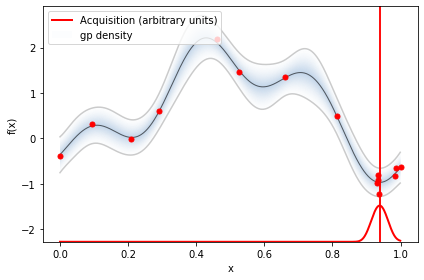

Next points: [array([0.9405956]), array([0.94059558])]


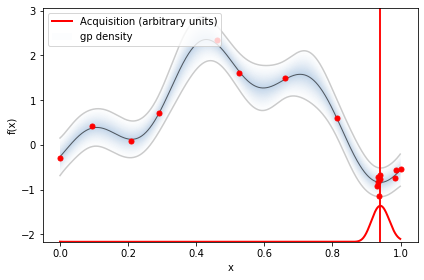

Next points: [array([0.940079]), array([0.940079])]


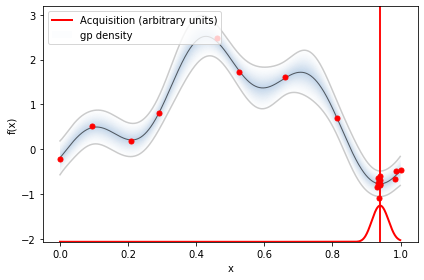

Next points: [array([0.93996734]), array([0.93996734])]


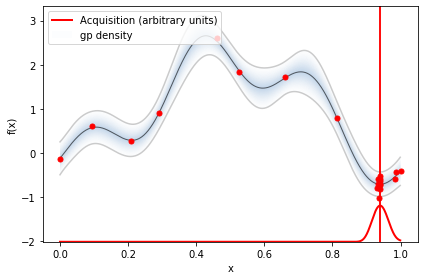

Next points: [array([0.93974765]), array([0.9397477])]


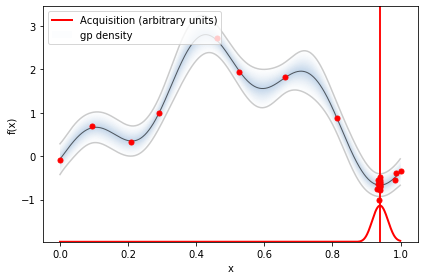

Next points: [array([0.93968961]), array([0.93968961])]


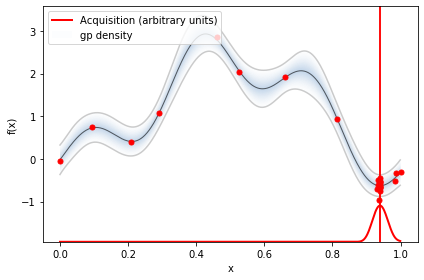

Next points: [array([0.93973727]), array([0.93973727])]


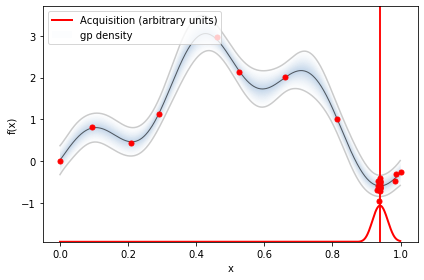

Next points: [array([0.93945321]), array([0.93945317])]


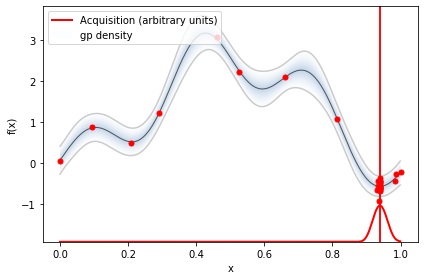

In [5]:
# Initialize BOpt - specify iterations, batch size, kernel, domain
iterations = 15
batch_size = 2
domain =[{'name': 'var1', 'type': 'continuous', 'domain': (0,1)}]
k = GPy.kern.RBF(1, variance=1.)
# k = GPy.kern.Matern52(1, variance=1.)


# Run BOpt loop
next_point = None

for _ in range(iterations):
    if next_point is not None:
        for i in next_point:
            X, Y = sample_point(X, Y, i, f)
    bo = GPyOpt.methods.BayesianOptimization(f = None, 
                                             domain = domain, 
                                             X = X[:, None], 
                                             Y = Y,
                                             kernel = k,
                                             batch_size = batch_size,
                                             acquisition_type='EI',
                                             evaluator_type = 'thompson_sampling',
                                             de_duplication = True)
    next_point = bo.suggest_next_locations()
    print('Next points:', [i for i in next_point])
    bo.plot_acquisition()
    plt.show()